# Dry Beans Classification



• Seed quality is definitely influential in crop production. Therefore, seed classification is essential for both marketing and production to provide the principles of sustainable agricultural systems.

• In this notebook we try different algorithms to classify the most well-known 7 types of beans ; Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira, depending ONLY on dimension and shape features of bean varieties.



# Data fields


• Area (A): The area of a bean zone and the number of pixels within its boundaries.
    
• Perimeter (P): Bean circumference is defined as the length of its border.
    
• MajorAxisLength (L): The distance between the ends of the longest line that can be drawn from a bean
    .
• MinorAxisLength (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
    
• AspectRatio (K): Defines the relationship between L and l.
    
• Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
    
• ConvexArea (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
    
• EquivDiameter (Ed): The diameter of a circle having the same area as a bean seed area.
    
• Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
    
• Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
    .
    
• Roundness (R): Calculated with the following formula: (4 pi A)/(P^2)
• Compactness (CO): Measures the roundness of an object: Ed/L.
        
• ShapeFactor1 (SF1): L/d
    
• ShapeFactor2 (SF2): l/d
    
• ShapeFactor3 (SF3): 4A/(L^2 * pi)
    
• ShapeFactor4 (SF4): 4A/(L l pi)
    
• Calories/100gm : calories in every 100gm of beans

• water content/100gm : water content in every 100 gm of beans
    
• Fiber/100gm : fiber content in every 100 gm of dry beans
    
• Class :: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'C:\Users\USER\Downloads\Dry beans dataset.xlsx')

In [3]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Calories/100gm,water content/100gm,Fiber/100gm,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,335.206922,12.747719,25.359985,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,335.815803,12.737099,25.068978,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,335.534142,12.367255,24.627246,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,335.620127,12.377225,25.244723,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,335.274226,12.863297,24.865791,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,335.530845,12.010844,25.370831,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,335.703799,12.780327,25.340059,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,335.392644,12.067997,25.046933,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,335.568568,12.106234,25.313024,DERMASON


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 13611 non-null  int64  
 1   Perimeter            13611 non-null  float64
 2   MajorAxisLength      13611 non-null  float64
 3   MinorAxisLength      13611 non-null  float64
 4   AspectRation         13611 non-null  float64
 5   Eccentricity         13611 non-null  float64
 6   ConvexArea           13611 non-null  int64  
 7   EquivDiameter        13606 non-null  float64
 8   Extent               13593 non-null  float64
 9   Solidity             13598 non-null  float64
 10  roundness            13593 non-null  float64
 11  Compactness          13601 non-null  float64
 12  ShapeFactor1         13602 non-null  float64
 13  ShapeFactor2         13609 non-null  float64
 14  ShapeFactor3         13610 non-null  float64
 15  ShapeFactor4         13609 non-null 

In [5]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Calories/100gm,water content/100gm,Fiber/100gm
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13606.000000,13593.000000,13598.000000,13593.000000,13601.000000,13602.000000,13609.000000,13610.000000,13609.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.056212,0.749724,0.987144,0.873328,0.799847,0.006564,0.001716,0.643597,0.995063,335.503242,12.498045,24.999703
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.185820,0.049101,0.004660,0.059487,0.061703,0.001128,0.000596,0.098997,0.004367,0.288347,0.289099,0.288935
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,335.000031,12.000126,24.500102
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.059123,0.718627,0.985674,0.832276,0.762449,0.005902,0.001153,0.581391,0.993703,335.254607,12.248228,24.749220
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.427346,0.759847,0.988285,0.883167,0.801243,0.006646,0.001694,0.642048,0.996385,335.505673,12.493320,25.001200
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.434506,0.786852,0.990012,0.916877,0.834244,0.007272,0.002170,0.696007,0.997881,335.752754,12.748652,25.247272
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,335.999905,12.999753,25.499974


In [6]:
data.isna().sum()

Area                    0
Perimeter               0
MajorAxisLength         0
MinorAxisLength         0
AspectRation            0
Eccentricity            0
ConvexArea              0
EquivDiameter           5
Extent                 18
Solidity               13
roundness              18
Compactness            10
ShapeFactor1            9
ShapeFactor2            2
ShapeFactor3            1
ShapeFactor4            2
Calories/100gm          0
water content/100gm     0
Fiber/100gm             0
Class                   0
dtype: int64

# EDA

In [7]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Calories/100gm', 'water content/100gm',
       'Fiber/100gm', 'Class'],
      dtype='object')

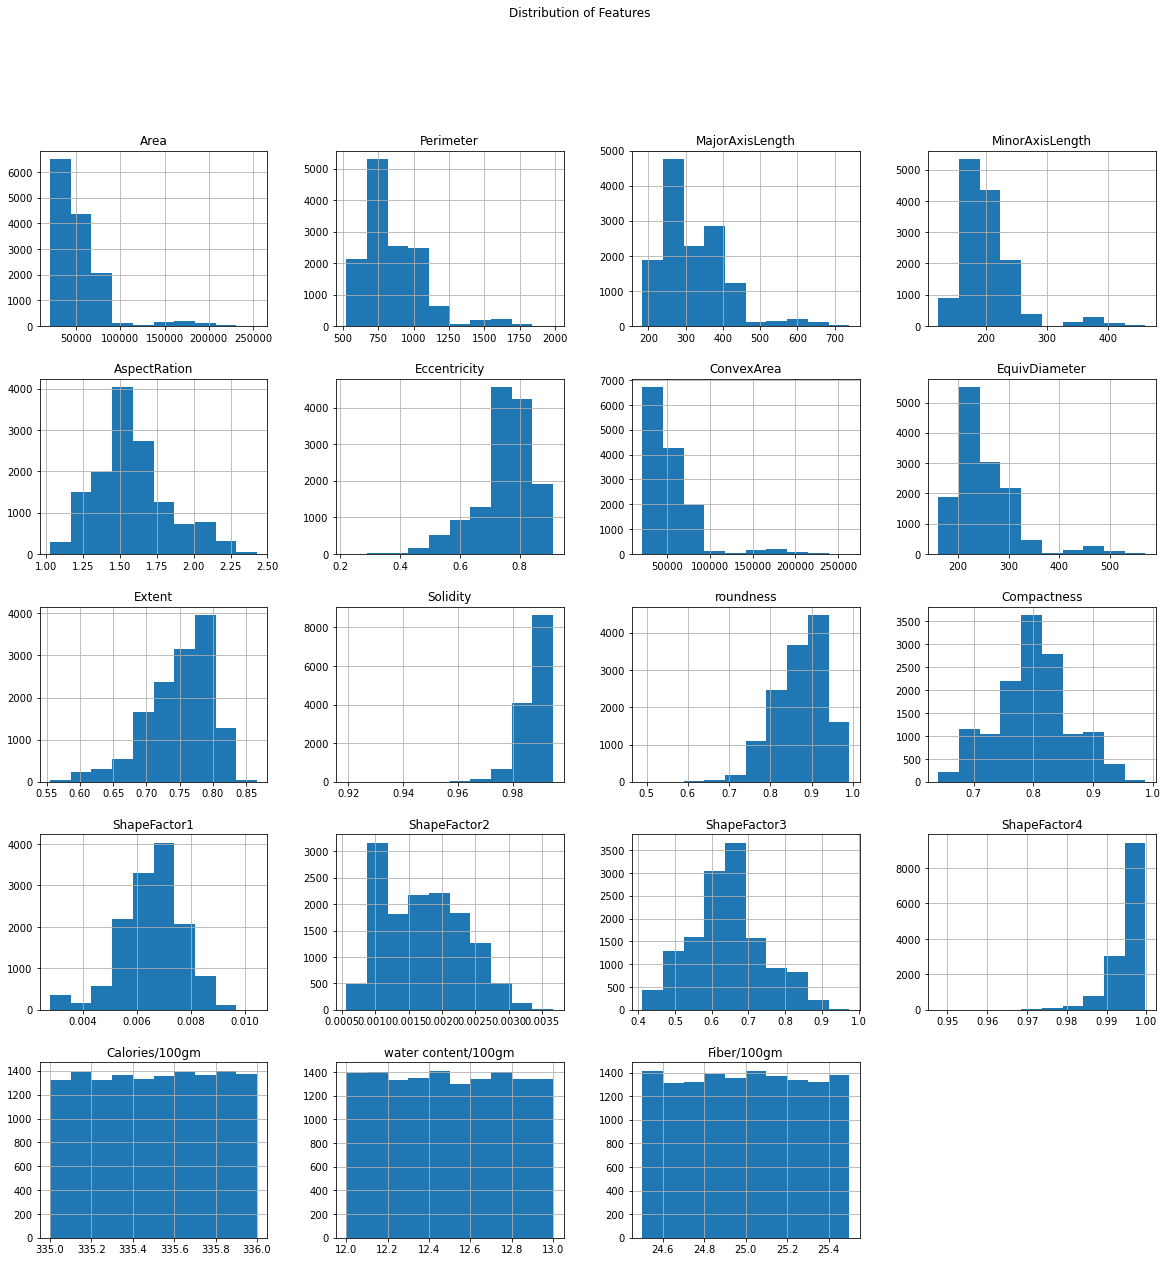

In [8]:
data.hist(figsize=(20,20))
plt.suptitle('Distribution of Features')
plt.show()

1.Extend,solidity,roundness,shapefactor4 may have exponential distribution.

2.Shape factor 1,shapefactor 3,Aspectratio,compactness may have guassian distribution.

3.skewness in the graph shows presence of outliers in the columns.

4.Calories/100gm, water content/100gm,Fiber/100gm are seed compositions.we are considering only physical features to classify the seeds.so we can remove these columns.

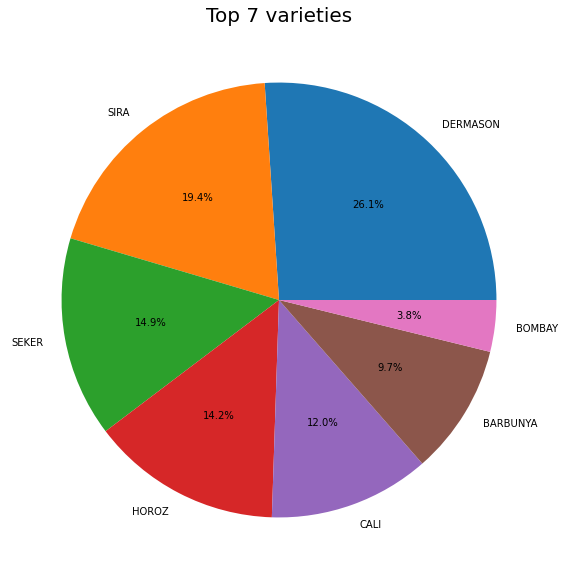

In [9]:
plt.figure(figsize=(10,10))
plt.pie(data['Class'].value_counts().head(7), labels=data['Class'].value_counts().head(7).index, autopct='%1.1f%%')
plt.title('Top 7 varieties', color='black', fontsize=20)
plt.show()

 Among the tested beans, Dermason variety is more and Bombay beans is the least one. we have an imbalanced dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


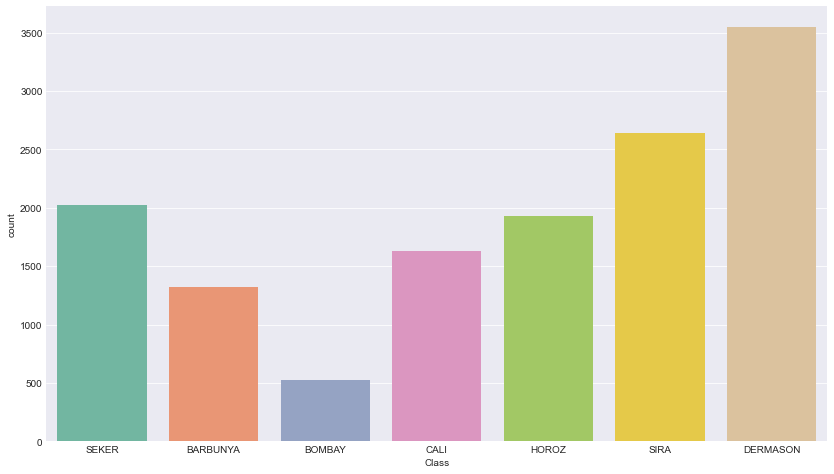

In [10]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-darkgrid')
sns.countplot(data.Class,palette='Set2')
plt.show()
import warnings
warnings.filterwarnings('ignore')

As it is noticeable, there's a huge discrepancy between the least (Bombay) and most (Dermason) common bean species, with a difference of a factor of 6.

# univarite analysis

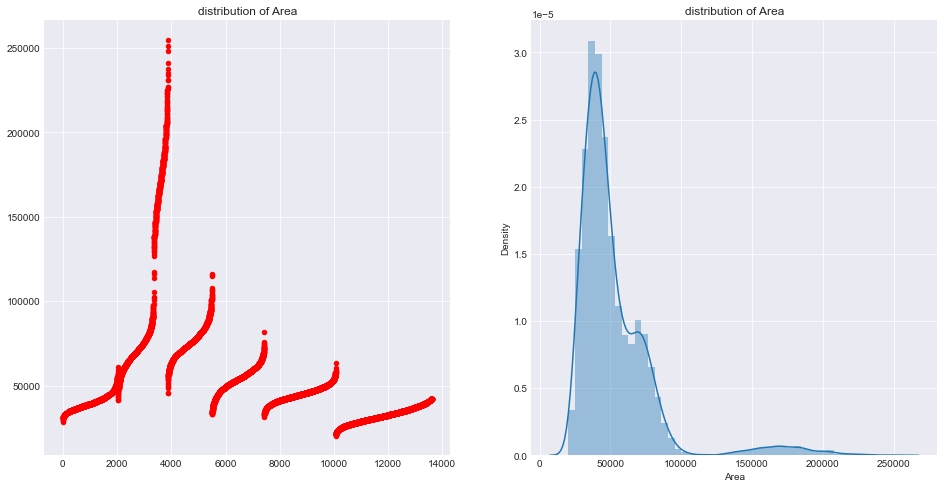

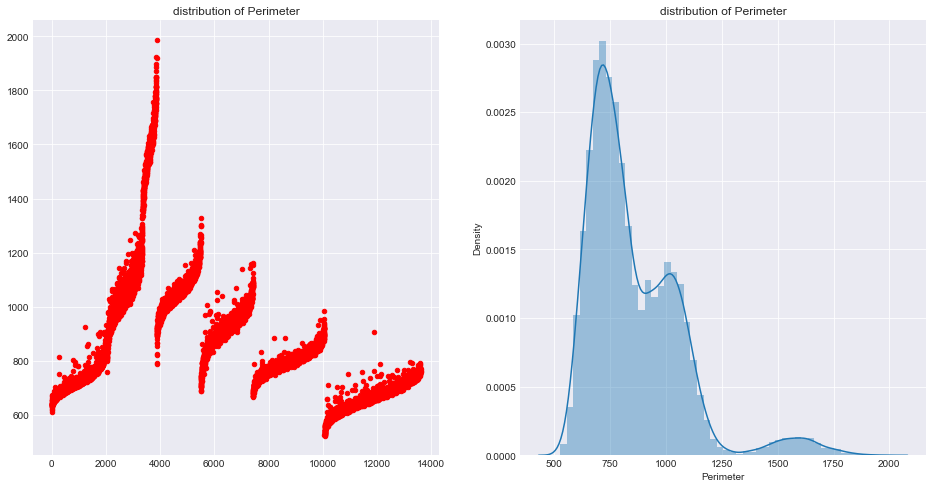

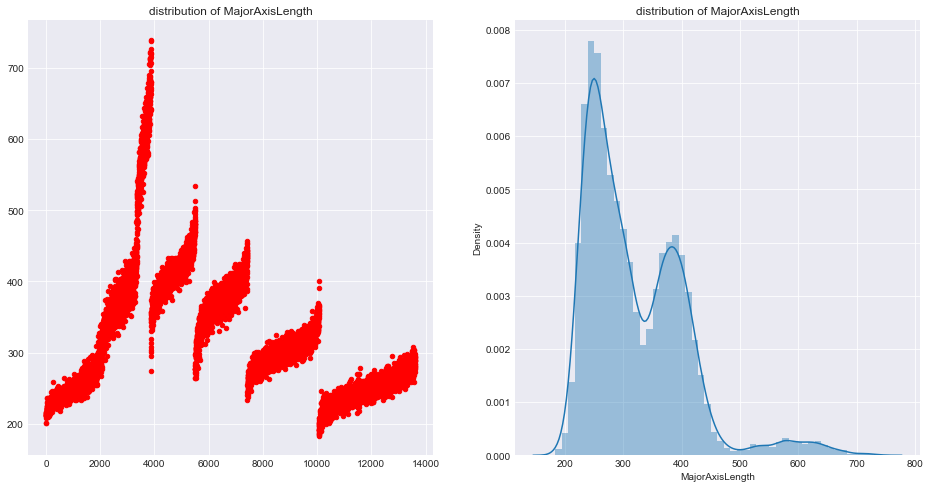

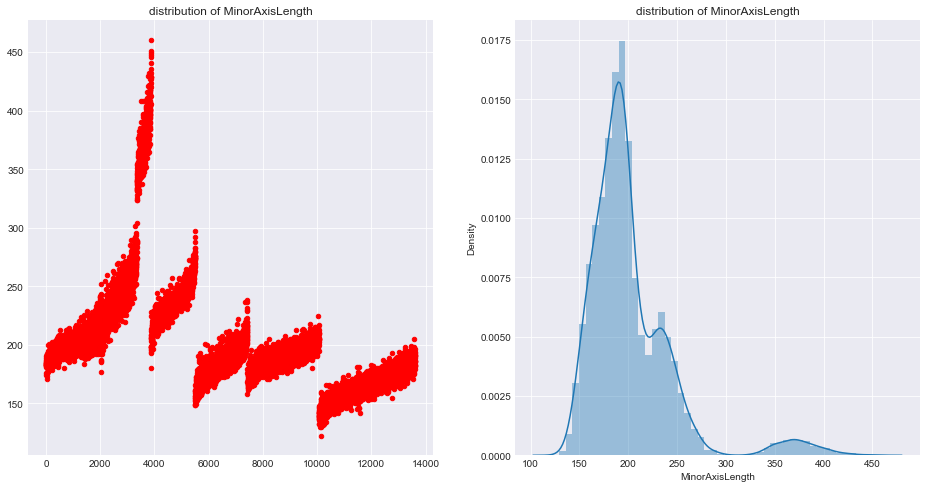

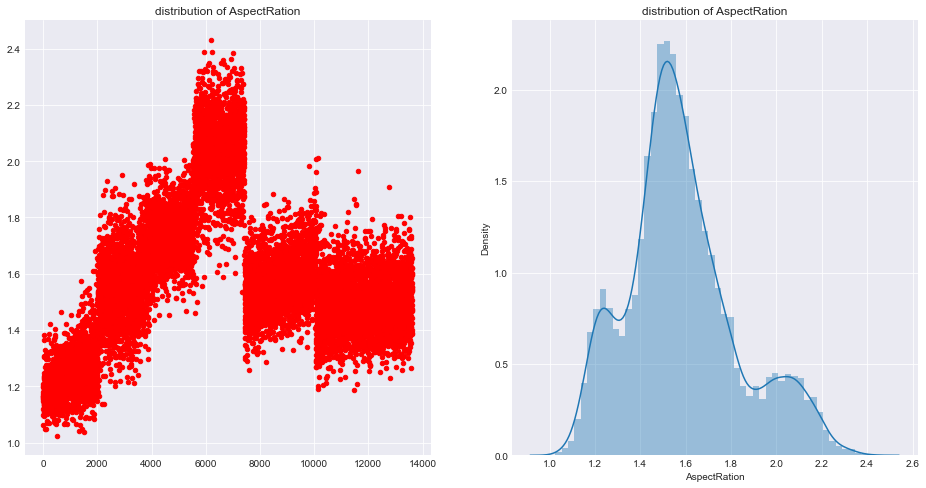

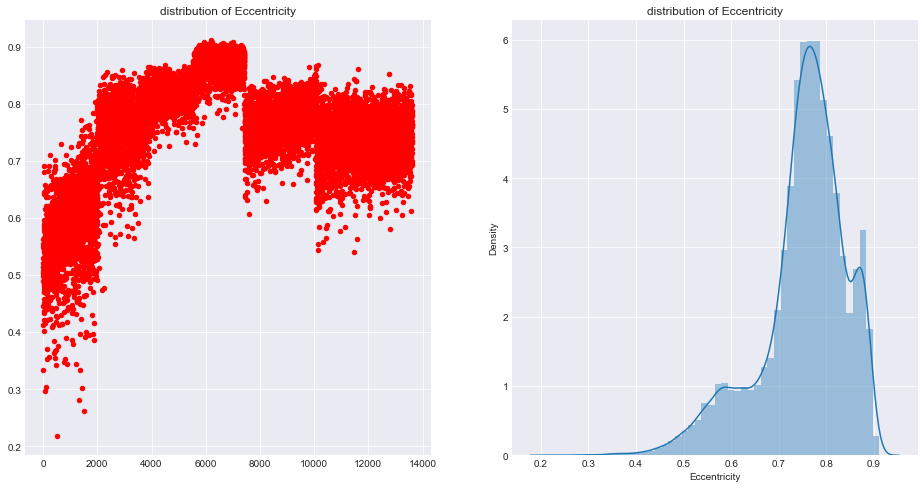

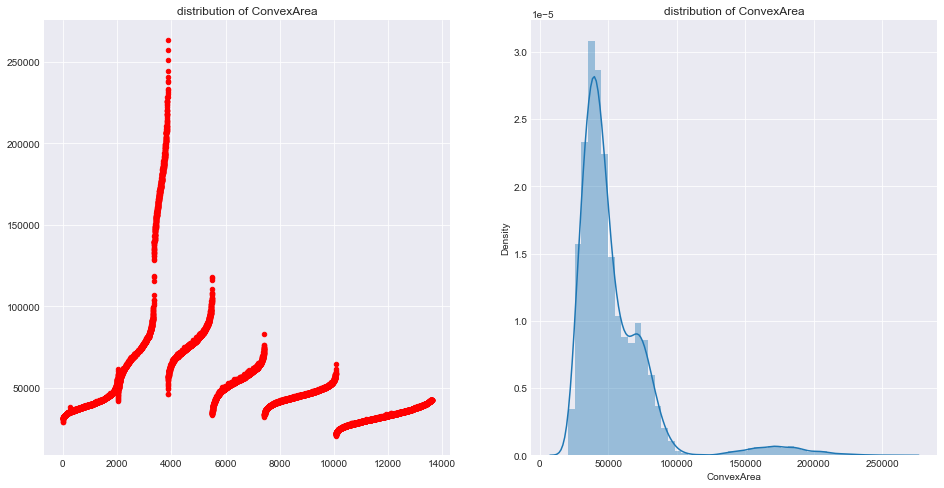

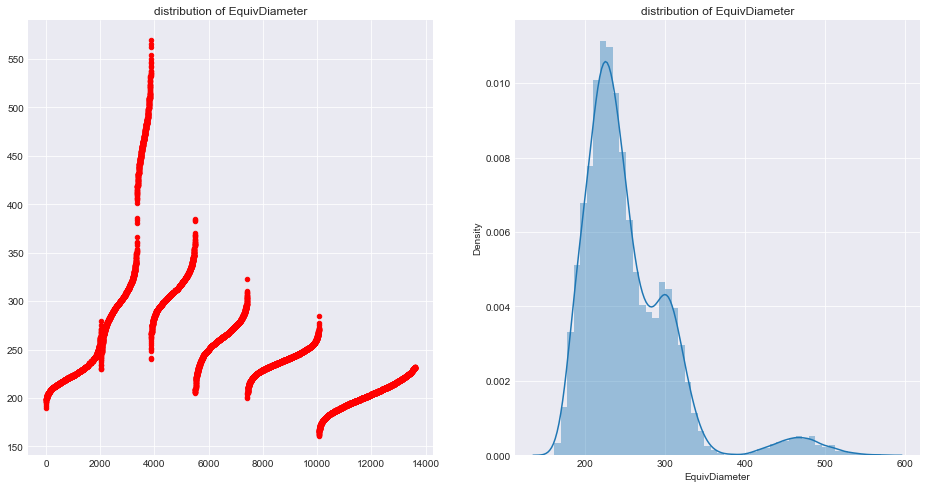

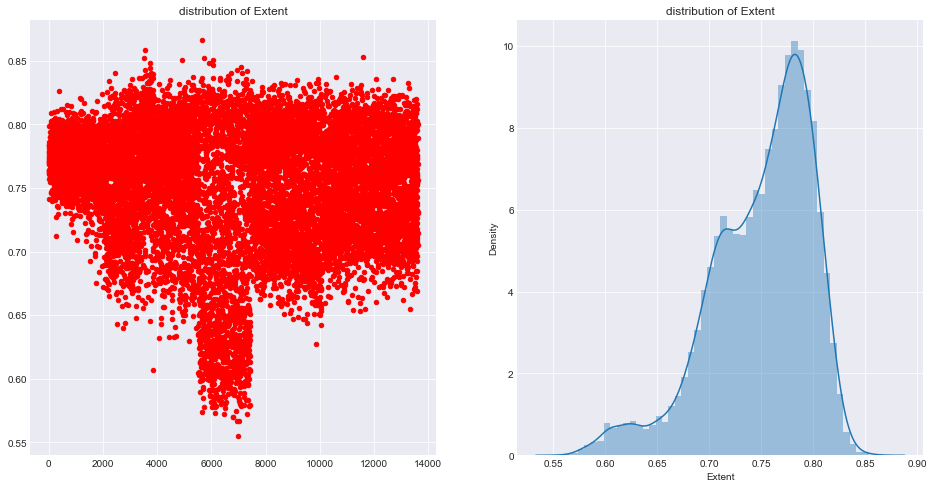

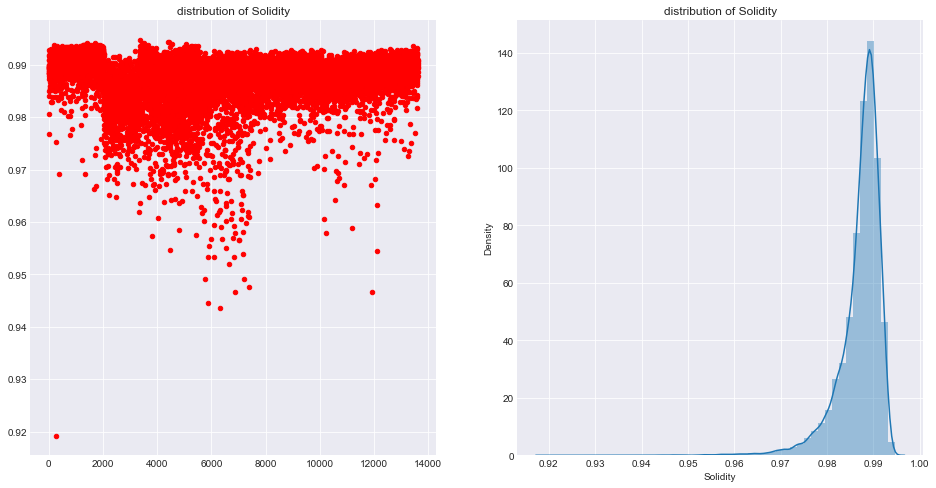

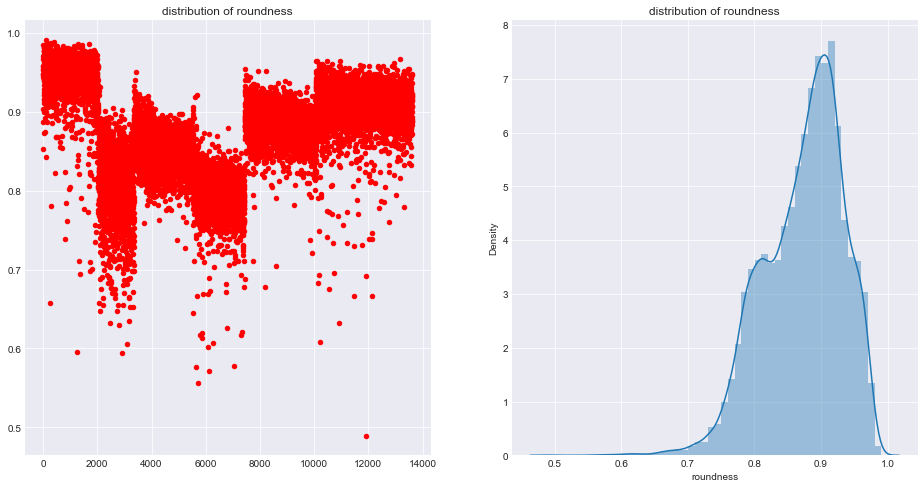

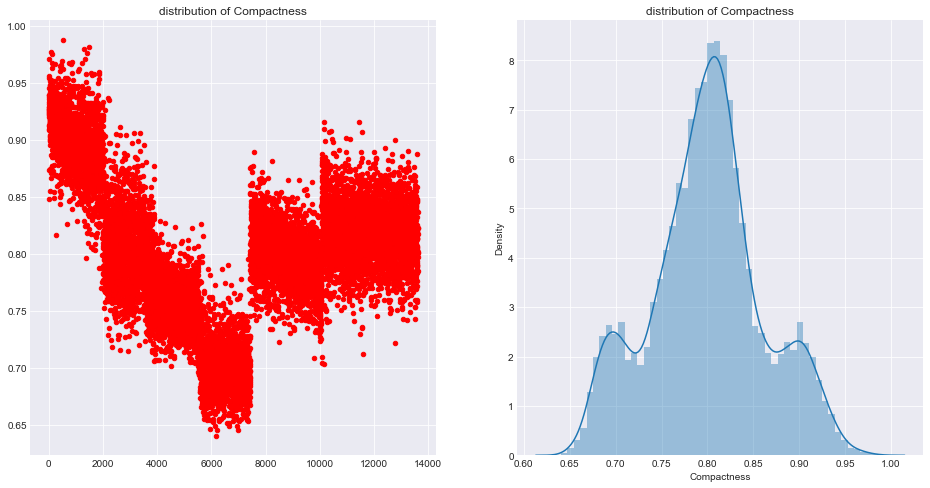

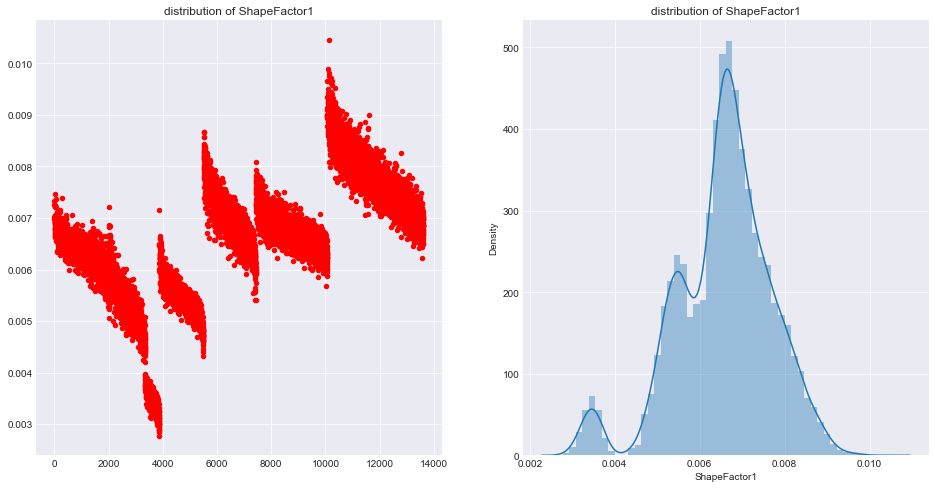

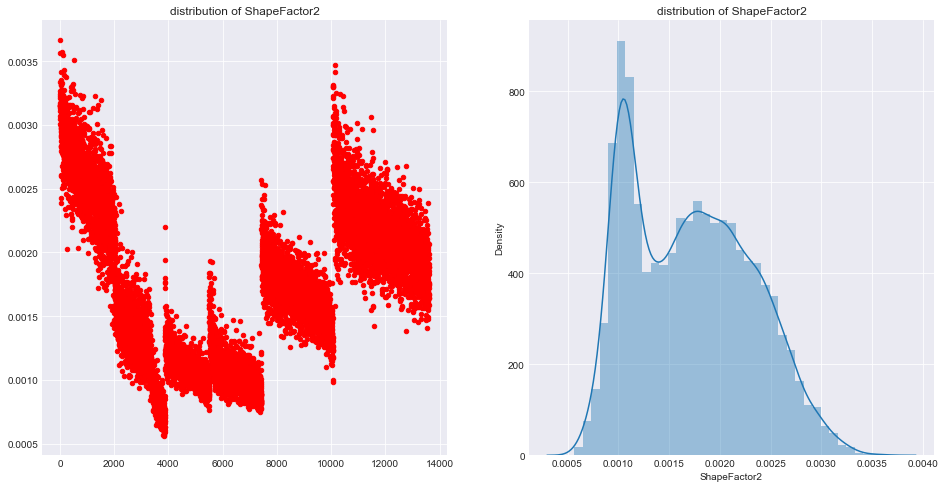

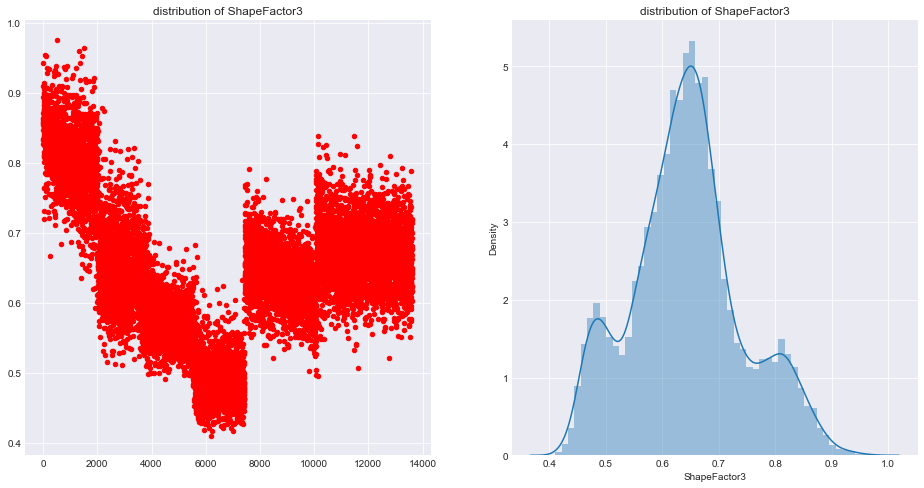

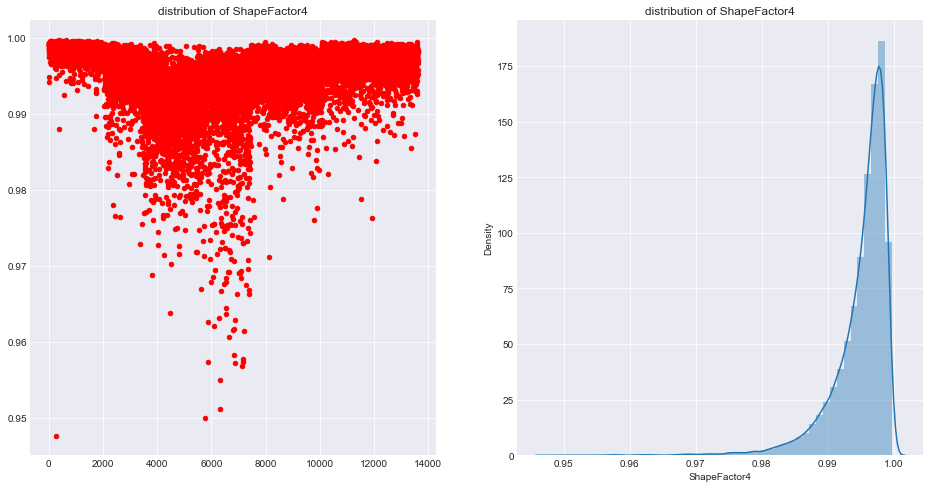

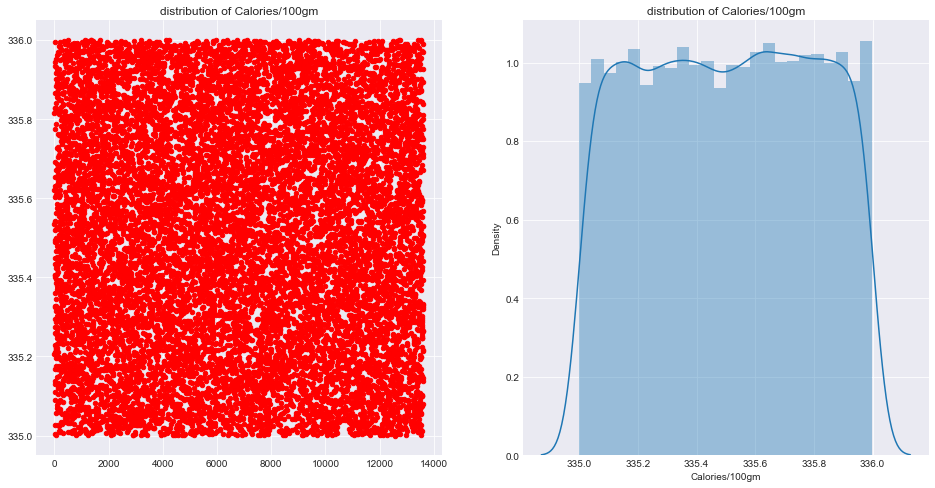

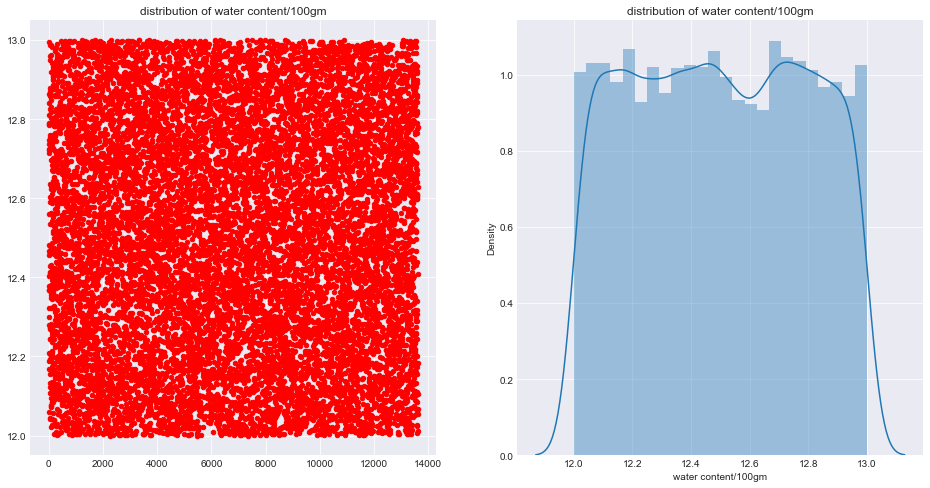

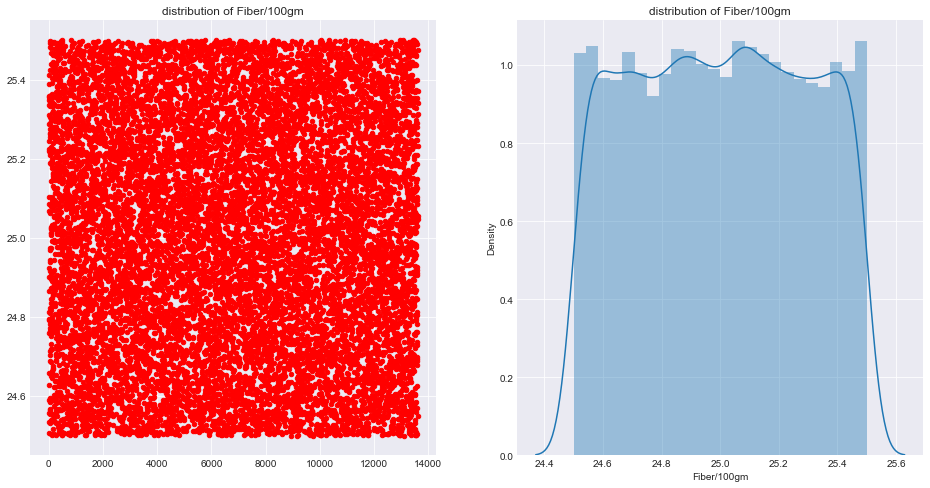

In [11]:
c= data.drop(['Class'],axis=1)
for i in c:
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.scatter(data.index,data[i],s=20,c='red')
    plt.title('distribution of {}'.format(i))

    plt.subplot(1,2,2)
    sns.distplot(data[i])
    plt.title('distribution of {}'.format(i))
    
    

Some distributions have long tails and most are bi-modal which means that some bean classes should be quite distinct from others.

# Bivariate analysis

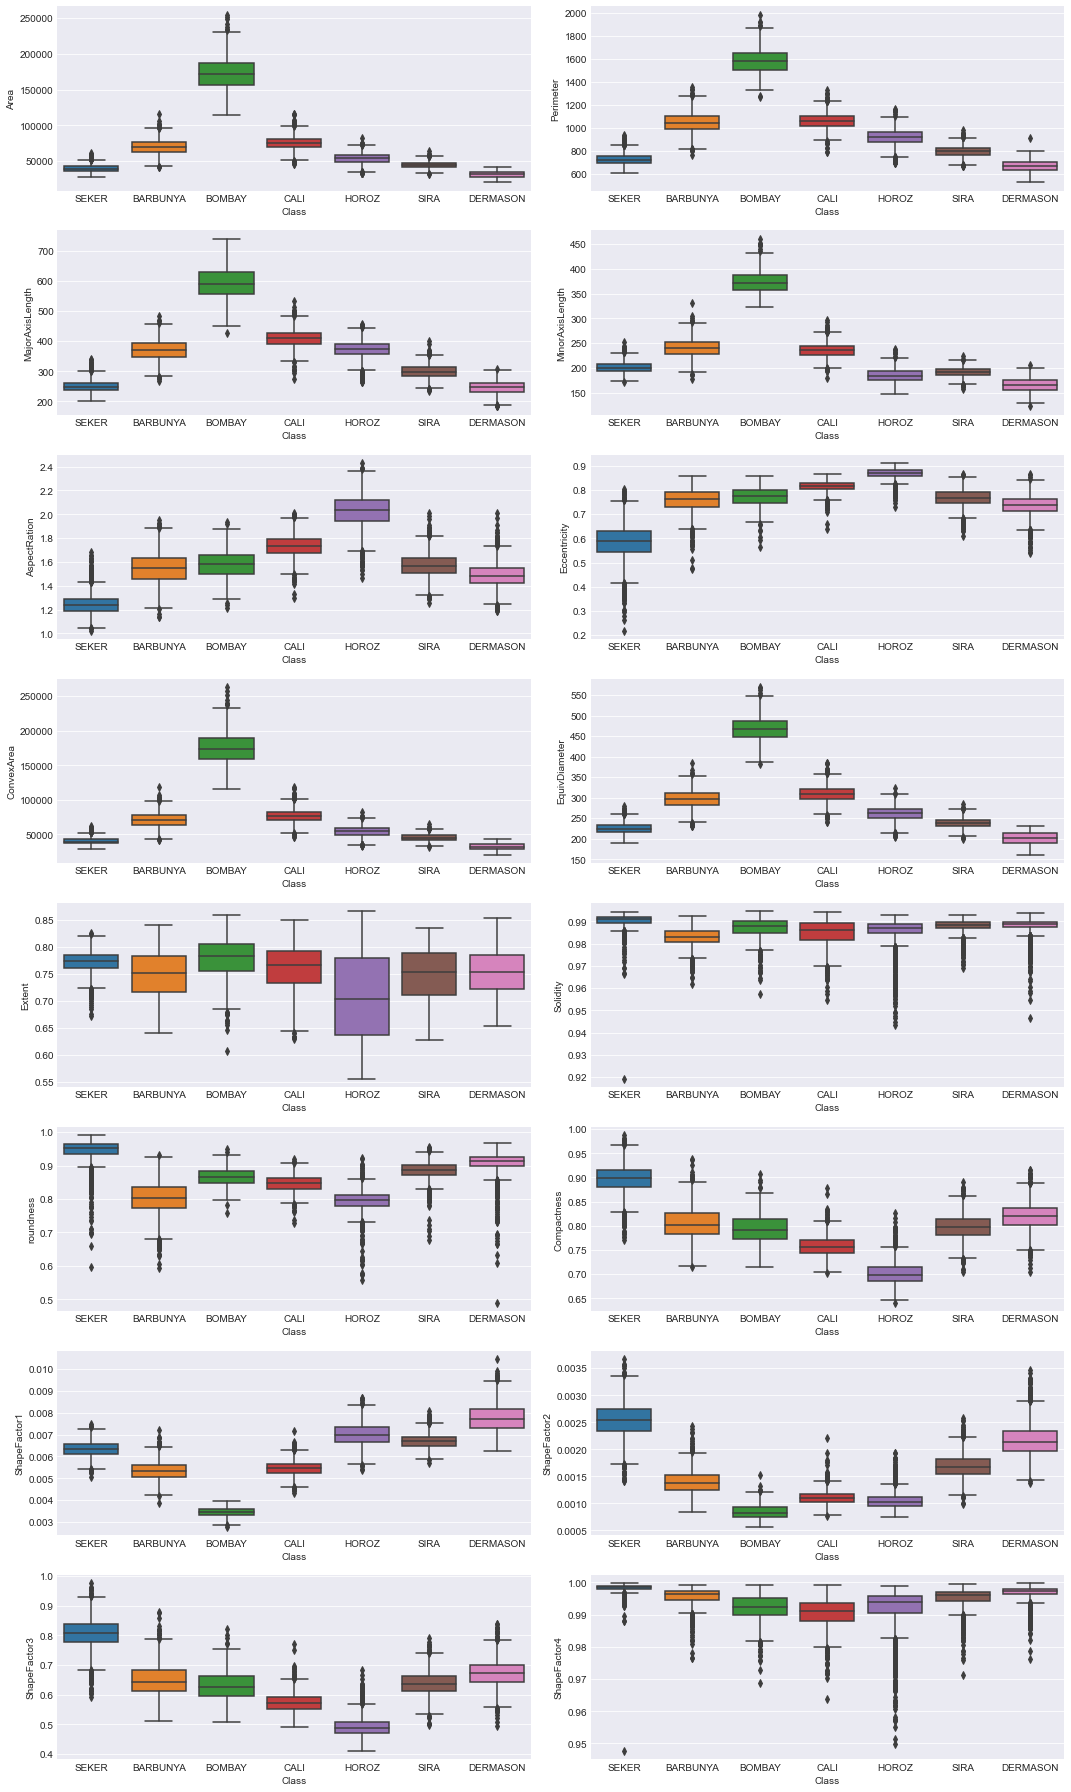

In [12]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for i, subplot in zip(c,ax.flatten()):
    sns.boxplot(x=data['Class'], y= data[i], ax=subplot)
plt.tight_layout()

Bombay and Horoz classes are distict from others

# preprocessing

In [13]:
#finding missing values
data.isna().sum()

Area                    0
Perimeter               0
MajorAxisLength         0
MinorAxisLength         0
AspectRation            0
Eccentricity            0
ConvexArea              0
EquivDiameter           5
Extent                 18
Solidity               13
roundness              18
Compactness            10
ShapeFactor1            9
ShapeFactor2            2
ShapeFactor3            1
ShapeFactor4            2
Calories/100gm          0
water content/100gm     0
Fiber/100gm             0
Class                   0
dtype: int64

In [14]:
data.dtypes

Area                     int64
Perimeter              float64
MajorAxisLength        float64
MinorAxisLength        float64
AspectRation           float64
Eccentricity           float64
ConvexArea               int64
EquivDiameter          float64
Extent                 float64
Solidity               float64
roundness              float64
Compactness            float64
ShapeFactor1           float64
ShapeFactor2           float64
ShapeFactor3           float64
ShapeFactor4           float64
Calories/100gm         float64
water content/100gm    float64
Fiber/100gm            float64
Class                   object
dtype: object

In [15]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Calories/100gm', 'water content/100gm',
       'Fiber/100gm', 'Class'],
      dtype='object')

In [16]:
#filling missing values with median
for i in ['EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']:
    data[i]=data[i].fillna(data[i].median())
    


In [17]:
data.isnull().sum()

Area                   0
Perimeter              0
MajorAxisLength        0
MinorAxisLength        0
AspectRation           0
Eccentricity           0
ConvexArea             0
EquivDiameter          0
Extent                 0
Solidity               0
roundness              0
Compactness            0
ShapeFactor1           0
ShapeFactor2           0
ShapeFactor3           0
ShapeFactor4           0
Calories/100gm         0
water content/100gm    0
Fiber/100gm            0
Class                  0
dtype: int64

In [18]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Calories/100gm,water content/100gm,Fiber/100gm
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.050839,0.749737,0.987145,0.873341,0.799848,0.006564,0.001716,0.643597,0.995063,335.503242,12.498045,24.999703
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.175612,0.049070,0.004658,0.059449,0.061681,0.001128,0.000596,0.098993,0.004366,0.288347,0.289099,0.288935
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,335.000031,12.000126,24.500102
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718644,0.985678,0.832456,0.762512,0.005903,0.001154,0.581394,0.993703,335.254607,12.248228,24.749220
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.427346,0.759847,0.988285,0.883167,0.801243,0.006646,0.001694,0.642048,0.996385,335.505673,12.493320,25.001200
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.398621,0.786841,0.990010,0.916843,0.834220,0.007271,0.002170,0.696006,0.997881,335.752754,12.748652,25.247272
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,335.999905,12.999753,25.499974


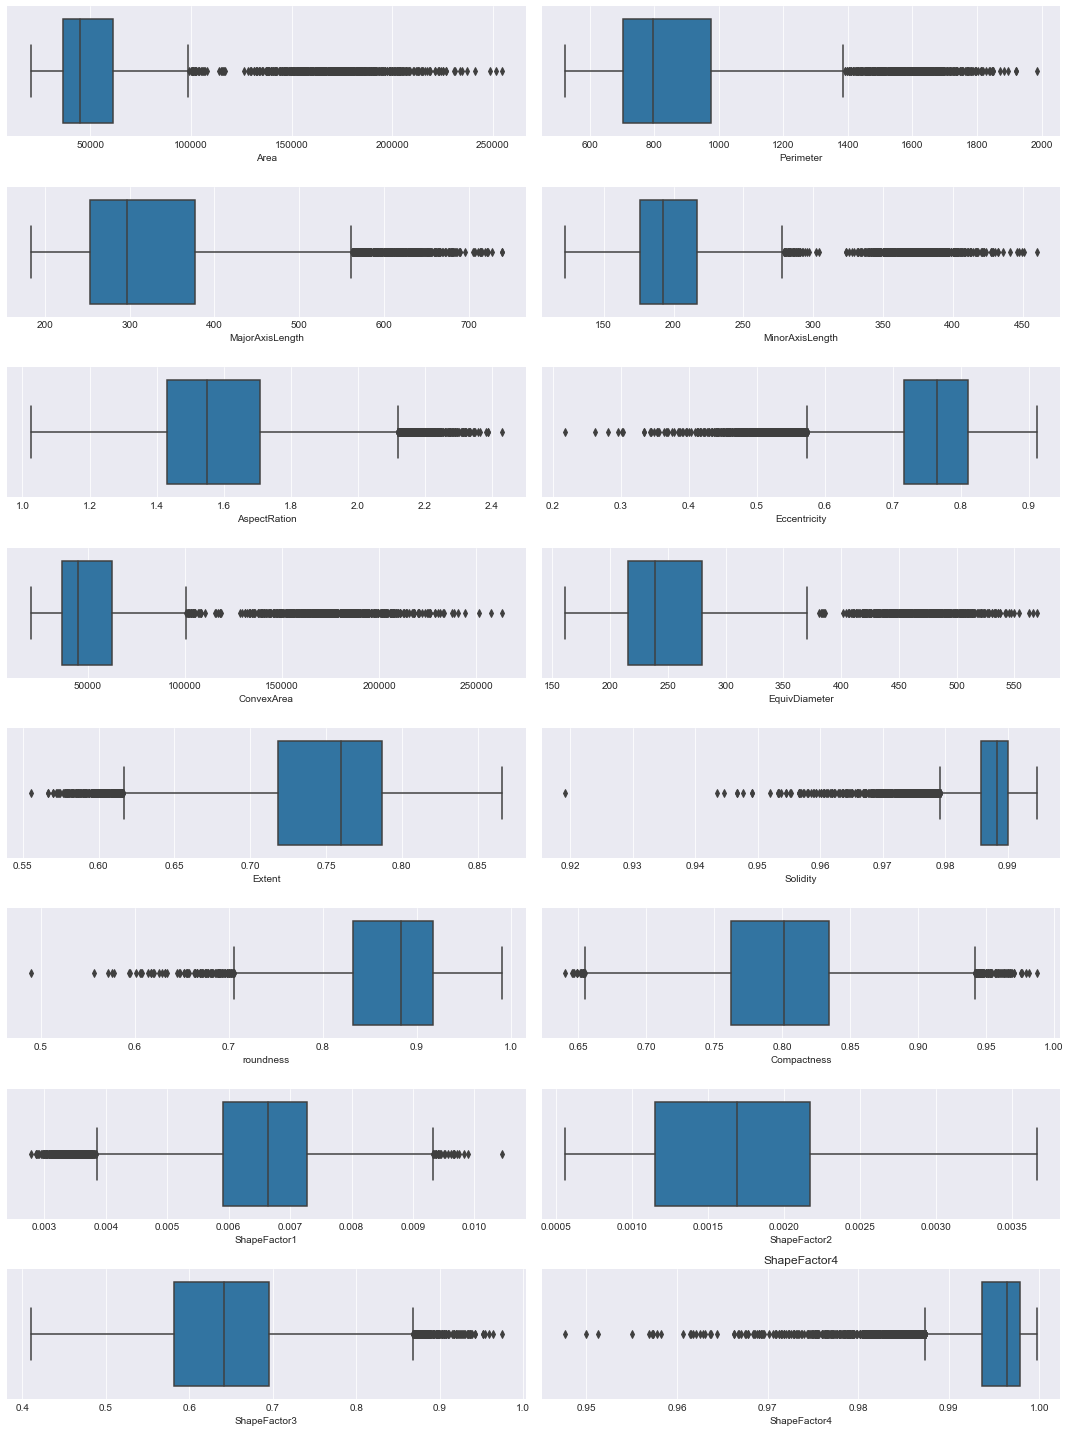

In [19]:
#finding outliers
fig,ax =plt.subplots(8,2,figsize=(15,20))

for i, subplot in zip(c,ax.flatten()):
    sns.boxplot(data[i],ax=subplot)
    plt.title('{}'.format(i))
plt.tight_layout()


#There are outliers in almost all numerical columns. 
#Since, the number of outliers is large for some columns, we replace them with corresponding upper or lower limits.

In [20]:
# managing the outliers
for i in c:
    q1=np.percentile(data[i],25,interpolation='midpoint')
    q2=np.percentile(data[i],50,interpolation='midpoint')
    q3=np.percentile(data[i],75,interpolation='midpoint')
    iqr=q3-q1
    up_lim=q3+1.5*iqr
    low_lim=q1-1.5*iqr
    print('\033[1;4m','{}'.format(i),'\033[0m')
    print('Q1:',q1)
    print('Q2:',q2)
    print('Q3:',q3)
    print('IQR:',iqr)
    print('lower limit:',low_lim)
    print('upper limit:',up_lim)
    outlier=[]
    for x in data[i]:
        if ((x<low_lim) or (x>up_lim)):
            outlier.append(x)
    
    data[i]=np.where(data[i]<low_lim,low_lim,np.where(data[i]>up_lim,up_lim,data[i]))
    
        
     

 Area 
Q1: 36328.0
Q2: 44652.0
Q3: 61332.0
IQR: 25004.0
lower limit: -1178.0
upper limit: 98838.0
 Perimeter 
Q1: 703.5234999999999
Q2: 794.9409999999999
Q3: 977.213
IQR: 273.68950000000007
lower limit: 292.9892499999998
upper limit: 1387.7472500000001
 MajorAxisLength 
Q1: 253.3036327107013
Q2: 296.88336688673496
Q3: 376.4950124297296
IQR: 123.19137971902833
lower limit: 68.51656313215878
upper limit: 561.2820820082721
 MinorAxisLength 
Q1: 175.8481700385778
Q2: 192.43173331431822
Q3: 217.03174130329975
IQR: 41.18357126472196
lower limit: 114.07281314149485
upper limit: 278.8070982003827
 AspectRation 
Q1: 1.432306931834258
Q2: 1.5511236655616438
Q3: 1.7071089270344548
IQR: 0.27480199520019677
lower limit: 1.0201039390339628
upper limit: 2.11931191983475
 Eccentricity 
Q1: 0.715927745946016
Q2: 0.7644408063975098
Q3: 0.8104659844897781
IQR: 0.09453823854376209
lower limit: 0.5741203881303729
upper limit: 0.9522733423054213
 ConvexArea 
Q1: 36714.5
Q2: 45178.0
Q3: 62294.0
IQR: 25579.5


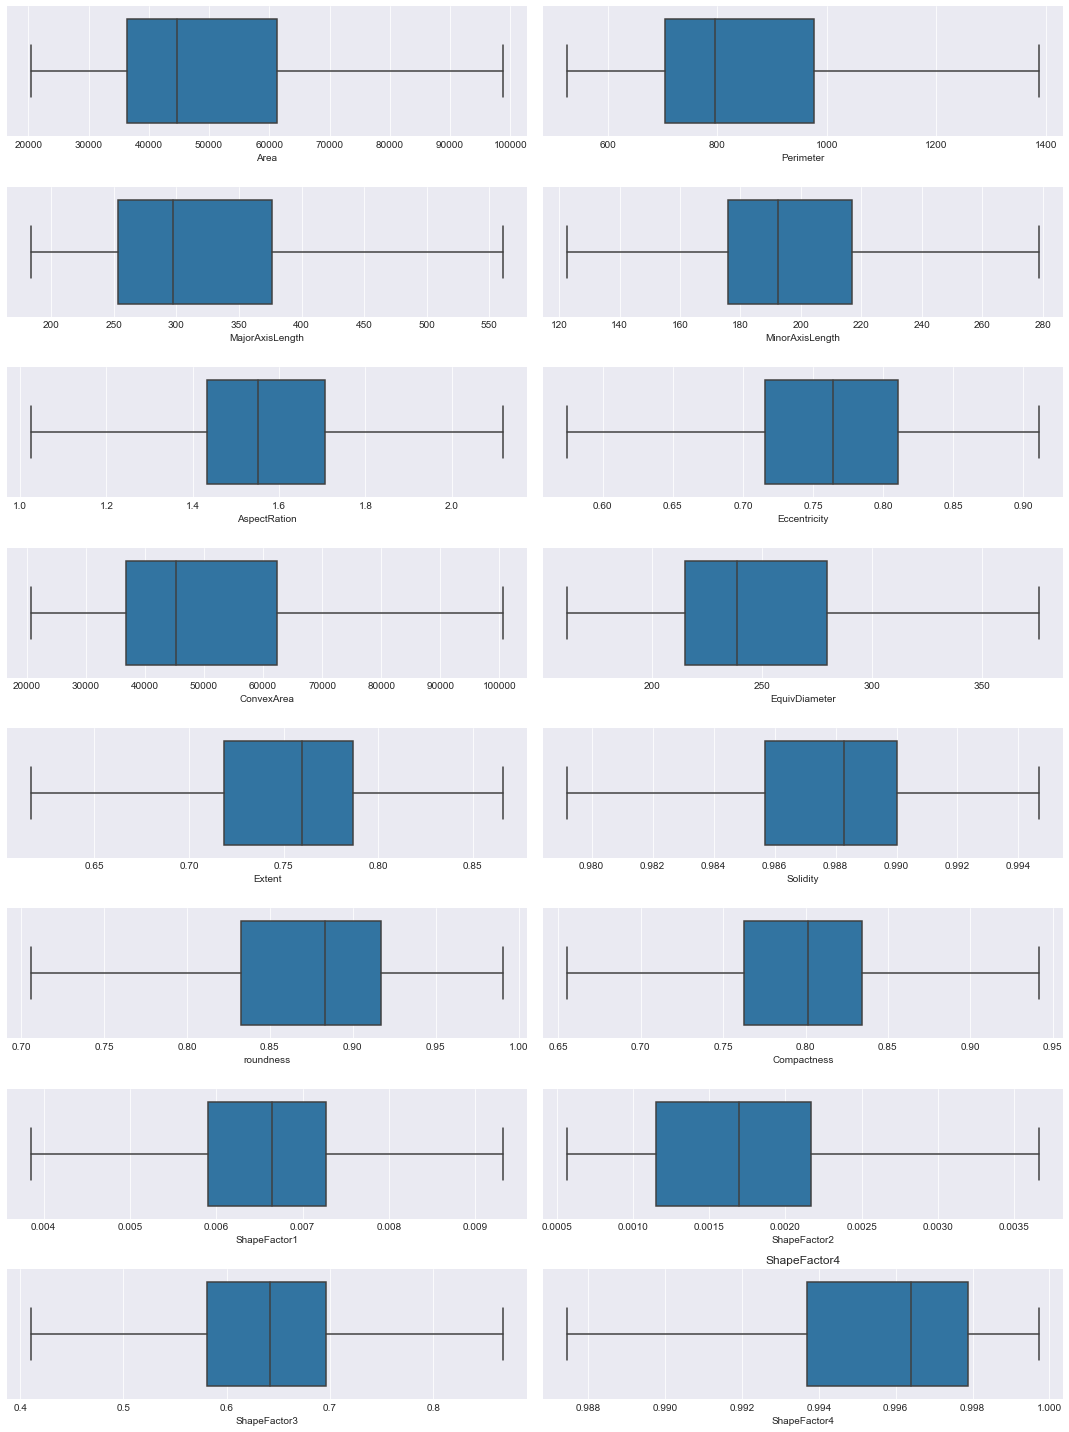

In [21]:
fig,ax =plt.subplots(8,2,figsize=(15,20))

for i, subplot in zip(c,ax.flatten()):
    sns.boxplot(data[i],ax=subplot)
    plt.title('{}'.format(i))
plt.tight_layout()

Now we have managed the outliers
#There is change in count, mean and standard deviation after removing missing values and outliers.

In [22]:
data.nunique()

Area                   11461
Perimeter              12917
MajorAxisLength        13165
MinorAxisLength        12975
AspectRation           13082
Eccentricity           12701
ConvexArea             11519
EquivDiameter          11481
Extent                 13249
Solidity               12743
roundness              13432
Compactness            13425
ShapeFactor1           13000
ShapeFactor2           13541
ShapeFactor3           13349
ShapeFactor4           12786
Calories/100gm         13611
water content/100gm    13611
Fiber/100gm            13611
Class                      7
dtype: int64

In [23]:
data.duplicated().sum()

0

In [24]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Calories/100gm,water content/100gm,Fiber/100gm
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,50173.343546,847.645953,318.571441,198.576406,1.580845,0.754255,50874.543127,249.480051,0.750065,0.987458,0.873635,0.799774,0.006579,0.001716,0.643255,0.995359,335.503242,12.498045,24.999703
std,18805.909740,188.983630,80.332564,32.736714,0.240826,0.083215,19191.287348,47.348691,0.048084,0.003568,0.058417,0.061468,0.001084,0.000596,0.098139,0.003294,0.288347,0.289099,0.288935
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.574120,20684.000000,161.243764,0.616349,0.979180,0.705876,0.654951,0.003850,0.000564,0.410339,0.987436,335.000031,12.000126,24.500102
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718644,0.985678,0.832456,0.762512,0.005903,0.001154,0.581394,0.993703,335.254607,12.248228,24.749220
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.427346,0.759847,0.988285,0.883167,0.801243,0.006646,0.001694,0.642048,0.996385,335.505673,12.493320,25.001200
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.398621,0.786841,0.990010,0.916843,0.834220,0.007271,0.002170,0.696006,0.997881,335.752754,12.748652,25.247272
max,98838.000000,1387.747250,561.282082,278.807098,2.119312,0.911423,100663.250000,375.894547,0.866195,0.994677,0.990685,0.941782,0.009324,0.003665,0.867925,0.999733,335.999905,12.999753,25.499974


In [25]:
# features reduction 

In [26]:
data=data.drop(['Calories/100gm','water content/100gm','Fiber/100gm'],axis=1)
data.columns


Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

Calories/100gm','water content/100gm','Fiber/100gm are compositions of dry beans.We are considering only the physical features of the dry bean.So we are removing 'Calories/100gm','water content/100gm','Fiber/100gm'from the data

In [27]:
# encoding

In [28]:
#Here we have only one object column.there are seven varieties of seeds are used.so we are using Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Class']=le.fit_transform(data['Class'])
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.57412,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734.0,638.018,200.524796,182.734419,1.097356,0.57412,29172.0,191.272750,0.783968,0.984986,0.887034,0.941782,0.006979,0.003564,0.867925,0.998430,5
2,29380.0,624.110,212.826130,175.931143,1.209713,0.57412,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008.0,645.884,210.557999,182.516516,1.153638,0.57412,30724.0,195.467062,0.782681,0.979180,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140.0,620.134,201.847882,190.279279,1.060798,0.57412,30417.0,195.896503,0.773098,0.990893,0.984877,0.941782,0.006697,0.003665,0.867925,0.999166,5
5,30279.0,634.927,212.560556,181.510182,1.171067,0.57412,30600.0,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,5
6,30477.0,670.033,211.050155,184.039050,1.146768,0.57412,30970.0,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.867925,0.999049,5
7,30519.0,629.727,212.996755,182.737204,1.165591,0.57412,30847.0,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,5
8,30685.0,635.681,213.534145,183.157146,1.165852,0.57412,31044.0,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,5
9,30834.0,631.934,217.227813,180.897469,1.200834,0.57412,31120.0,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5


In [29]:
# normalization

In [30]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
data_scaled = pd.DataFrame(min_max.fit_transform(data),columns = data.columns)

In [31]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.574120,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734.0,638.018,200.524796,182.734419,1.097356,0.574120,29172.0,191.272750,0.783968,0.984986,0.887034,0.941782,0.006979,0.003564,0.867925,0.998430,5
2,29380.0,624.110,212.826130,175.931143,1.209713,0.574120,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008.0,645.884,210.557999,182.516516,1.153638,0.574120,30724.0,195.467062,0.782681,0.979180,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140.0,620.134,201.847882,190.279279,1.060798,0.574120,30417.0,195.896503,0.773098,0.990893,0.984877,0.941782,0.006697,0.003665,0.867925,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [32]:
# feature engineering 

<AxesSubplot:>

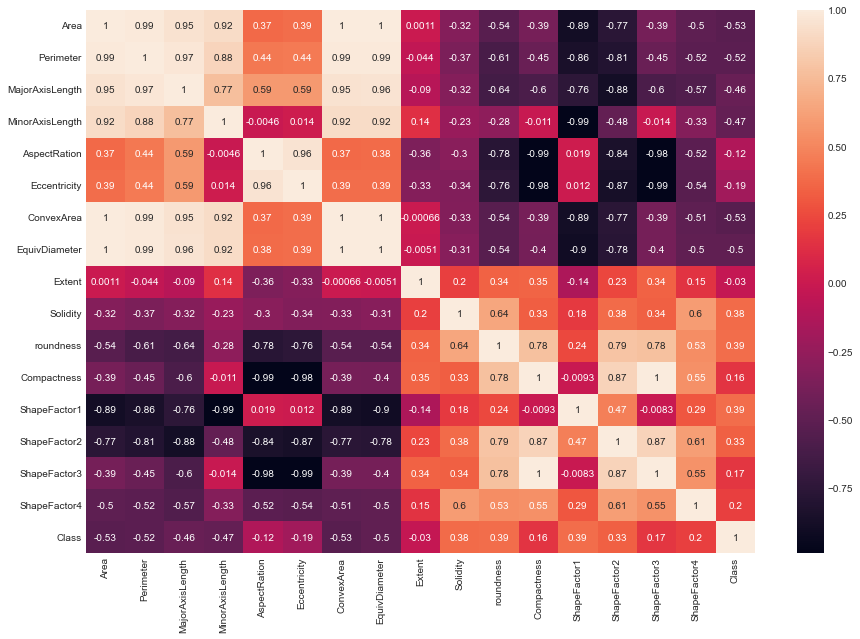

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

From this correlation matrix we can exctract features that are strongly correlated with each other.
Since we have a mirrored matrix the analysis can be done by just exctracting the upper matrix triangle and searching for values with an absolute value of more than 0.9 which is our criteria for correlated features.
The first set of features correlated are:

Area
Perimeter
MajorAxisLength
MinorAxisLength
ConvexArea
EquivDiameter
ShapeFactor1  

The feature to remove is the one that presents the highest correlation with the Class label which in this case is the Perimeter.

The second set of correlated features are:

ShapeFactor3
Compactness
Eccentricity
AspectRatio
From this set of features the retained one is Eccentricity.
So the following features will be dropped:

ShapeFactor3
Compactness
AspectRatio
Area
MajorAxisLength
MinorAxisLength
ConvexArea
EquivDiameter
ShapeFactor1

In [34]:
data=data.drop(['ShapeFactor3','Compactness','AspectRation','Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','ShapeFactor1'], axis = 1)

In [35]:
data.columns

Index(['Perimeter', 'Eccentricity', 'Extent', 'Solidity', 'roundness',
       'ShapeFactor2', 'ShapeFactor4', 'Class'],
      dtype='object')

In [36]:
data

,Perimeter,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,Class
0,610.291,0.574120,0.763923,0.988856,0.958027,0.003147,0.998724,5
1,638.018,0.574120,0.783968,0.984986,0.887034,0.003564,0.998430,5
2,624.110,0.574120,0.778113,0.989559,0.947849,0.003048,0.999066,5
3,645.884,0.574120,0.782681,0.979180,0.903936,0.003215,0.994199,5
4,620.134,0.574120,0.773098,0.990893,0.984877,0.003665,0.999166,5
...,...,...,...,...,...,...,...,...
13606,759.696,0.765002,0.714574,0.990331,0.916603,0.001749,0.998385,3
13607,757.499,0.735702,0.799943,0.990752,0.922015,0.001886,0.998219,3
13608,759.321,0.734065,0.729932,0.989899,0.918424,0.001888,0.996767,3
13609,763.779,0.741055,0.705389,0.987813,0.907906,0.001852,0.995222,3


In [37]:
# modeling

In [38]:
X=data.drop(['Class'],axis=1)
y=data['Class']

In [39]:
#Splitting the dataset into train data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape


(10888, 7)

In [40]:
#Creating a function for training and predicting the data.

from sklearn.metrics import f1_score,accuracy_score
from time import time

table={'Training Time':[],'Prediction Time(Test)':[],'F1 Score(train)':[],'F1 Score(test)':[],'Accuracy (train)':[],'Accuracy (test)':[]}
comp_tab=pd.DataFrame(table)

def train_predict(clf, X_train, X_test, y_train, y_test):
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    train_time=round(end-start,4)


    y_pred = clf.predict(X_train)
    f1_train=f1_score(y_train.values, y_pred, average='micro', )
    accuracy_train=accuracy_score(y_train, y_pred)

    start = time()
    y_pred = clf.predict(X_test)
    end = time()
    f1_test=f1_score(y_test.values, y_pred, average='micro')
    accuracy_test=accuracy_score(y_test, y_pred)
    pred_time_test=round(end-start,4)

    return train_time,  pred_time_test, f1_train, f1_test,accuracy_train,accuracy_test

In [41]:
pip install Xgboost

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
LR = LogisticRegression()
SVM = SVC()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
XGB = XGBClassifier()
for clf in [LR, SVM, KNN, DT, RF, GB, XGB]:
    tt,pt_test,f1_train,f1_test,accuracy_train,accuracy_test=train_predict(clf, X_train, X_test, y_train, y_test)
    comp_tab.loc[len(comp_tab.index)] = [tt, pt_test, f1_train, f1_test,accuracy_train,accuracy_test]

comp_tab.insert(0, 'Algorithm', ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB', 'XGB']) 
comp_tab

,Algorithm,Training Time,Prediction Time(Test),F1 Score(train),F1 Score(test),Accuracy (train),Accuracy (test)
0,LR,0.9329,0.0000,0.796381,0.802057,0.796381,0.802057
1,SVM,4.1812,2.9304,0.638226,0.642674,0.638226,0.642674
2,KNN,0.0367,0.1409,0.804096,0.703268,0.804096,0.703268
3,DT,0.1242,0.0020,1.000000,0.885420,1.000000,0.885420
4,RF,2.1690,0.0820,1.000000,0.927286,1.000000,0.927286
5,GB,21.2236,0.0310,0.956741,0.928021,0.956741,0.928021
6,XGB,7.2131,0.0156,0.999908,0.921410,0.999908,0.921410


In [43]:
# build a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)


In [44]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [45]:
param_dist = {"max_depth":  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
              "max_features":['auto', 'sqrt'],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [46]:
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist,cv=3)

In [47]:
randomCV.fit(X, y)
print(randomCV.best_params_)

{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'criterion': 'entropy', 'bootstrap': True}


In [48]:
randomCV.cv_results_['mean_test_score']

array([0.70450371, 0.70692822, 0.72162222, 0.705018  , 0.69238116,
       0.70560576, 0.72316509, 0.70156491, 0.70957314, 0.70494453])

In [49]:
print(randomCV.score(X_test,y_test))

0.9757620271759089


In [50]:
rf=clf.fit(X_train,y_train)
predictions=rf.predict(X_test)

In [51]:
predictions_2 = rf.predict([[640.765,0.57412,0.770805,0.988395,0.946258,0.003174,0.999384]])
predictions_2

array([5])

In [52]:
d1.to_csv('name.csv',index=False)

NameError: name 'd1' is not defined

In [53]:
data['gender']=data['gender'].fillna(data['gender'].mode()[0])

KeyError: 'gender'